# Precipitation seasonality

First let's import necessary modules: <br>

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

Open and read a netCDF file.

In [2]:
# TRMM Monthly mean average precipitation
filename='trmm_mon_1998_2015_new.nc'
with xr.open_dataset(filename) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:    (time: 12, longitude: 1440, latitude: 400)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-12-15
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * latitude   (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Data variables:
    pcp        (time, latitude, longitude) float32 ...
    err        (time, latitude, longitude) float32 ...
    weight     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.4
    calendar:                  standard
    comments:                  file created by grads using lats4d available f...
    model:                     geos/das
    center:                    gsfc
    history:                   Mon Jun  6 13:47:33 2016: ncrcat /Users/jungeu...
    nco_openmp_thread_number:  1


Print variables in the file.

"pcp" is a variable for precipitation. You can see that the unit is mm/hour. I'm going to change the unit to mm/day. 

In [4]:
prcp=ds1.pcp*24

In [6]:
lat=f1.variables['latitude'][:]
lon=f1.variables['longitude'][:]
prcp=f1.variables['pcp'][:]*24.  # mm/hour to mm/day

Let's check the dimension of prcp.

Let's make a contour plot. We need a 2-D variable. So, let's make a plot for January precipitation.

Let's create a variable mon.

In [8]:
mon=np.arange(12)+1  # From month 0 to 12

#### Exercise
Make a line for Providence (41.89N, -71.41). First find the closest point.

In [10]:
lat_pvd=41.8
lon_pvd=-71.4+360
prcp_pvd=prcp.sel(latitude=lat_pvd,longitude=lon_pvd , method='nearest')

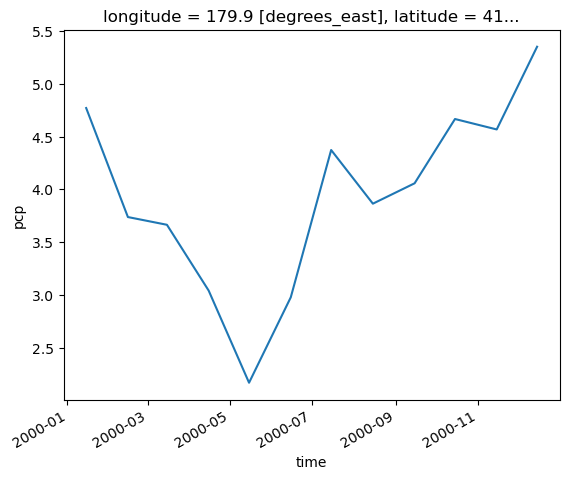

In [11]:
# Make a plot
prcp_pvd.plot()

Text(0.5, 1.0, 'Providence monthly mean precipitation')

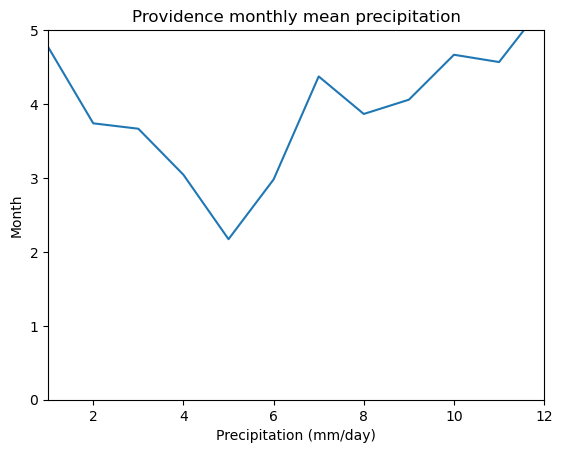

In [15]:
# Use a different x axis
plt.plot(mon,prcp_pvd)
plt.xlim(1,12)
plt.ylim(0,5)
plt.xlabel('Precipitation (mm/day)')
plt.ylabel('Month')
plt.title('Providence monthly mean precipitation')

#### Exercise
Make a line plot for Guam(13N,145E) and Cooktown(15S,145E).

#### Exercise
Make a line plot for Tawara(1.35N,172.92E) and Christmas Island(1.98N,158W).

#### Exercise
Make a line plot for Tawara(1.35N,172.92E) and Christmas Island(1.98N,158W).

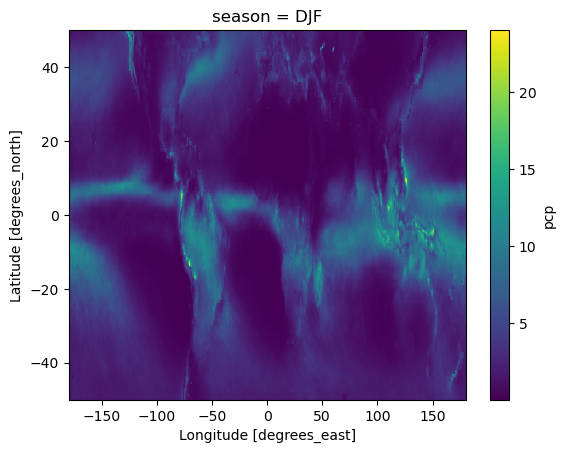

In [16]:
# Seasonal average
pr_season=prcp.groupby("time.season").mean("time")
# plot DJF average
pr_season.sel(season='DJF').plot()

#### Exercise
plot JJA average